## Netflix TV Show and Movies Data Analysis

This project involves analyzing a dataset of Netflix TV shows and movies to gain insights into the distribution and trends of various attributes such as content type, age certifications, release years, ratings, genres, and production countries. The analysis is performed using Python with libraries such as Pandas, Seaborn, and Matplotlib for data manipulation and visualization.

## IMPORTING ALL THE LIBRARIES

In [41]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
import ast

In [43]:
from collections import Counter

In [44]:
## LOADING THE DATA

In [45]:
netflix=pd.read_csv('Netflix_TV_Shows_and_Movies.csv')

In [46]:
## Understanding the data

In [47]:
netflix.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


In [48]:
netflix.shape

(5850, 15)

In [49]:
netflix.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

In [50]:
netflix.isnull().sum()

id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2619
runtime                    0
genres                     0
production_countries       0
seasons                 3744
imdb_id                  403
imdb_score               482
imdb_votes               498
tmdb_popularity           91
tmdb_score               311
dtype: int64

In [51]:
netflix.nunique()

id                      5850
title                   5798
type                       2
description             5829
release_year              63
age_certification         11
runtime                  202
genres                  1726
production_countries     452
seasons                   26
imdb_id                 5447
imdb_score                80
imdb_votes              3880
tmdb_popularity         4889
tmdb_score               394
dtype: int64

In [52]:
netflix.duplicated().sum()

0

## Making a copy of the data to perform ananlysis on it

In [53]:
df = netflix.copy()

In [54]:
df.shape

(5850, 15)

## Removing rows with NULL values

In [55]:
df = df.dropna(subset=["imdb_id"])
df = df.dropna(subset=["imdb_score"])
df = df.dropna(subset=["imdb_votes"])
df = df.dropna(subset=["tmdb_score"])
df.shape

(5131, 15)

In [56]:
df.head(50)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600
5,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,tt0063929,8.8,73424.0,17.617,8.306
6,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,395024.0,17.770,7.800
7,tm14873,Dirty Harry,MOVIE,When a madman dubbed 'Scorpio' terrorizes San ...,1971,R,102,"['thriller', 'action', 'crime']",['US'],NaN,tt0066999,7.7,155051.0,12.817,7.500
8,tm119281,Bonnie and Clyde,MOVIE,"In the 1930s, bored waitress Bonnie Parker fal...",1967,R,110,"['crime', 'drama', 'action']",['US'],NaN,tt0061418,7.7,112048.0,15.687,7.500
9,tm98978,The Blue Lagoon,MOVIE,Two small children and a ship's cook survive a...,1980,R,104,"['romance', 'action', 'drama']",['US'],NaN,tt0080453,5.8,69844.0,50.324,6.156
10,tm44204,The Guns of Navarone,MOVIE,A team of allied saboteurs are assigned an imp...,1961,NaN,158,"['action', 'drama', 'war']","['GB', 'US']",NaN,tt0054953,7.5,50748.0,13.844,7.300


In [57]:
df['release_year'].unique().min()

1954

In [58]:
df['release_year'].dtype

dtype('int64')

In [59]:
df['type'].unique()

array(['MOVIE', 'SHOW'], dtype=object)

## Vizualizing the Data to understand it further

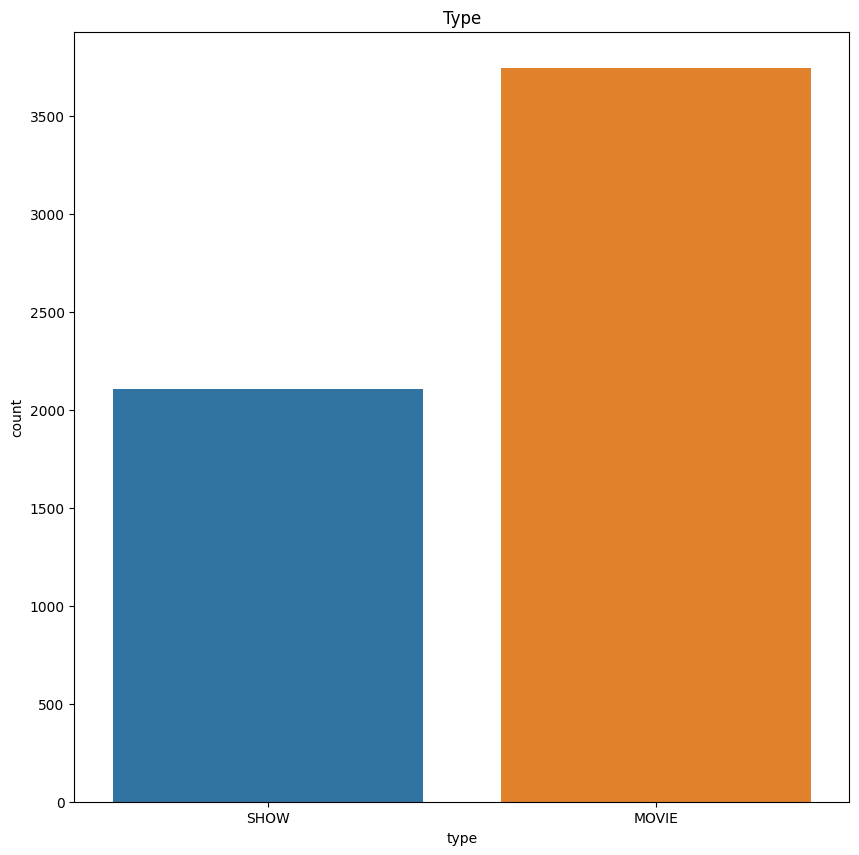

In [60]:
sns.countplot(x='type', data=netflix)
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Type')
plt.show()

## From the above vizualization we can see there are more "movies" than "shows"

Text(0.5, 1.0, 'Rating')

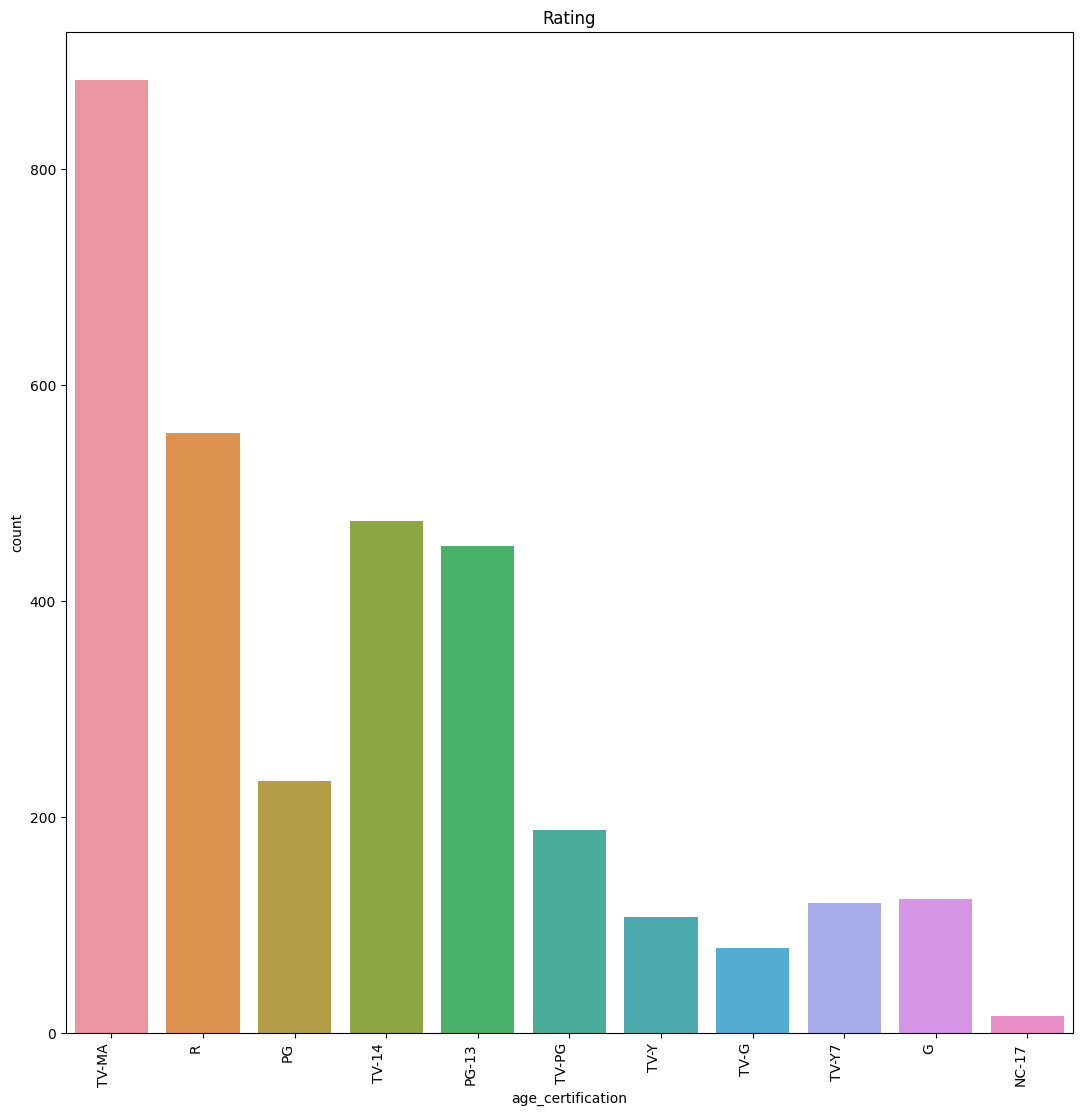

In [61]:
sns.countplot(x='age_certification', data=netflix)
sns.countplot(x='age_certification', data=netflix).set_xticklabels(sns.countplot(x='age_certification', data=netflix).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(13,13)
plt.title('Rating')

## We can say that majority of the shows and movies are for Adults

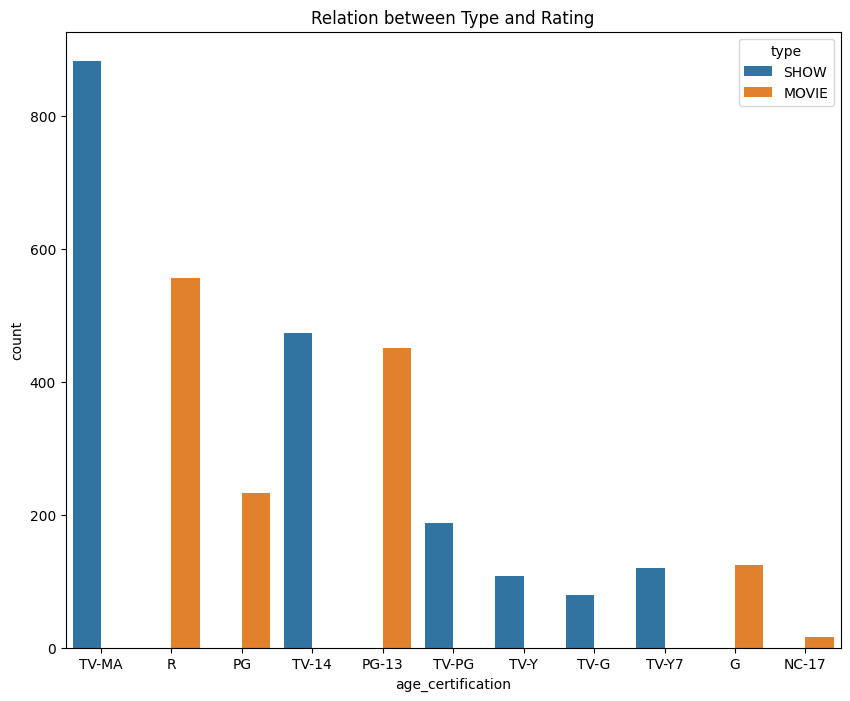

In [62]:
plt.figure(figsize=(10,8))
sns.countplot(x='age_certification',hue='type',data=netflix)
plt.title('Relation between Type and Rating')
plt.show()

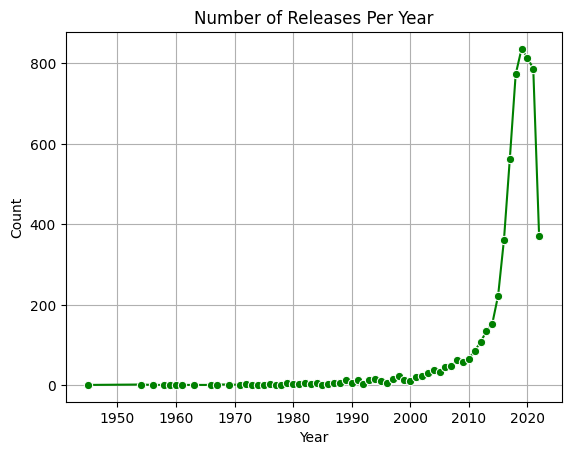

In [63]:
year_counts = netflix['release_year'].value_counts().sort_index()
sns.lineplot(x=year_counts.index, y=year_counts.values, marker='o', color='Green')
plt.title('Number of Releases Per Year')
plt.ylabel('Count')
plt.xlabel('Year')
plt.grid(True)
plt.show()

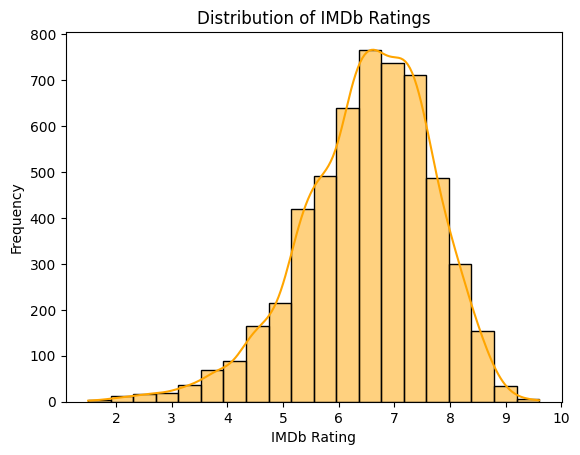

In [64]:
sns.histplot(netflix['imdb_score'].dropna(), bins=20, kde=True, color='Orange')
plt.title('Distribution of IMDb Ratings')
plt.xlabel('IMDb Rating')
plt.ylabel('Frequency')
plt.show()

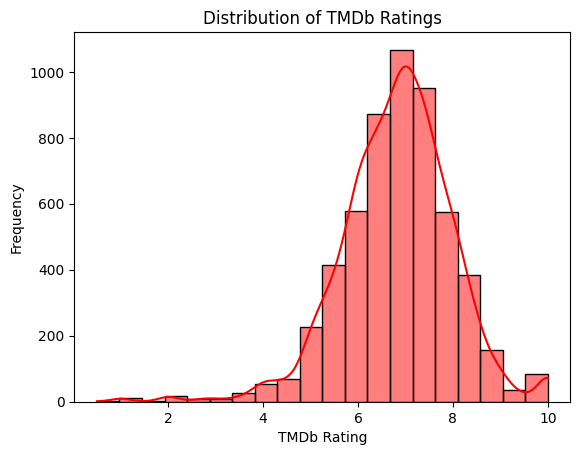

In [65]:
sns.histplot(netflix['tmdb_score'].dropna(), bins=20, kde=True, color='Red')
plt.title('Distribution of TMDb Ratings')
plt.xlabel('TMDb Rating')
plt.ylabel('Frequency')
plt.show()

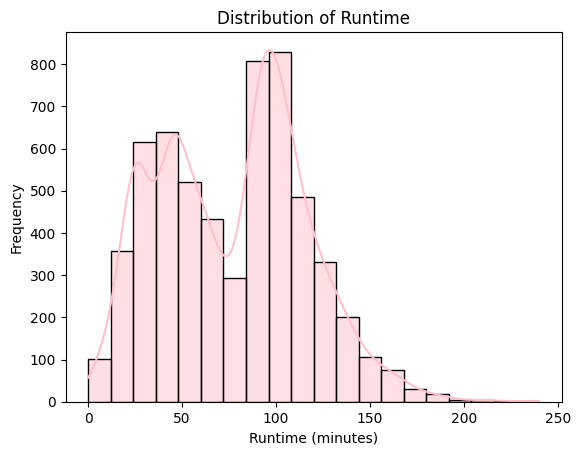

In [66]:
sns.histplot(netflix['runtime'].dropna(), bins=20, kde=True, color='pink')
plt.title('Distribution of Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.show()

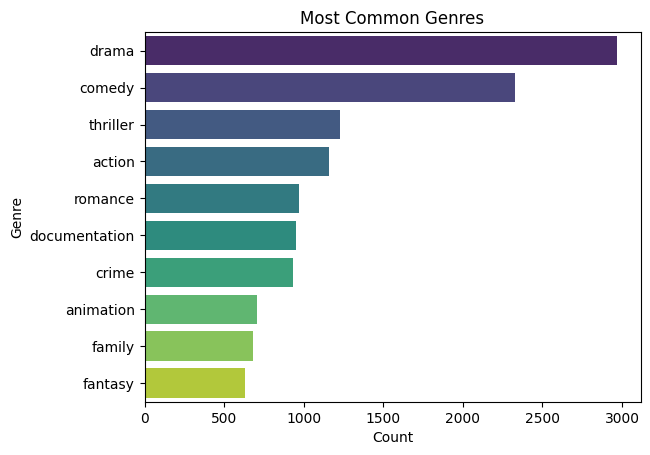

In [67]:
def count_genres(genres_list):
    all_genres = []
    for genres in genres_list:
        if pd.notnull(genres):
            all_genres.extend(ast.literal_eval(genres))
    return Counter(all_genres)

genre_counts = count_genres(netflix['genres'])
genre_df = pd.DataFrame.from_dict(genre_counts, orient='index', columns=['count']).reset_index()
genre_df = genre_df.rename(columns={'index': 'genre'}).sort_values(by='count', ascending=False)

sns.barplot(x='count', y='genre', data=genre_df.head(10), palette='viridis')
plt.title('Most Common Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

## Drama and Comedy topped the most common Genres

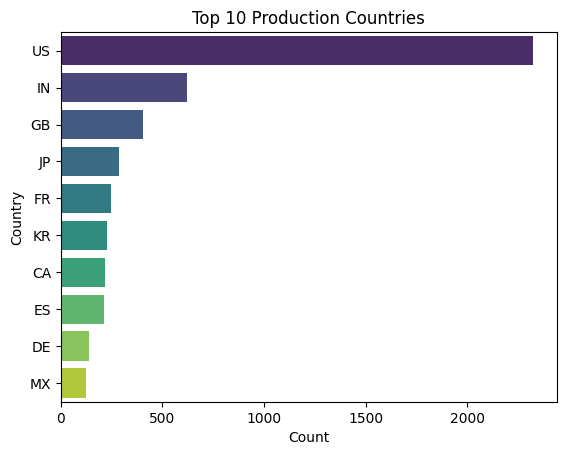

In [68]:
def count_countries(countries_list):
    all_countries = []
    for countries in countries_list:
        if pd.notnull(countries):
            all_countries.extend(ast.literal_eval(countries))
    return Counter(all_countries)

country_counts = count_countries(netflix['production_countries'])
country_df = pd.DataFrame.from_dict(country_counts, orient='index', columns=['count']).reset_index()
country_df = country_df.rename(columns={'index': 'country'}).sort_values(by='count', ascending=False)

sns.barplot(x='count', y='country', data=country_df.head(10), palette='viridis')
plt.title('Top 10 Production Countries')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()


## Visualization Highlights

## Content Type Distribution: 
Bar plot showing more movies than TV shows.

## Age Certification Distribution: 
Bar plots indicating the dominance of adult-rated content.

## Relation between Type and Age Certification: 
Visualization showing the distribution of age ratings across movies and TV shows.

## Number of Releases Per Year: 
Line plot illustrating the increasing trend of content releases over the years.

## IMDb and TMDb Ratings: 
Histogram plots depicting the distribution of ratings.

## Runtime Distribution: 
Histogram plot showing the distribution of runtime for the content.

## Most Common Genres: 
Bar plot displaying the top 10 genres.

## Top 10 Production Countries: 
Bar plot showing the countries with the highest number of productions.

## Conclusions from the Analysis

## Data Summary:
The dataset contains both movies and TV shows, with more movies than shows.
There are significant NULL values which were cleaned by dropping rows with missing values in key columns.

## Release Year:
The dataset includes releases from a wide range of years, with a minimum year identified.

## Age Certification:
Majority of the content is rated for adults.

## Type vs. Age Certification:
Both movies and shows have a diverse range of age certifications, with a notable amount aimed at adults.

## Releases Per Year:
There is a trend of the number of releases increasing over time.

## Ratings Distribution:
IMDb and TMDb ratings show a fairly normal distribution with a peak around average scores.
Runtime distribution indicates that most content has a typical runtime, with few extreme values.

## Genres and Production Countries:
The most common genres include Drama, Comedy, and Action.
The top production countries are dominated by the United States, followed by other significant contributors like India and the United Kingdom.

## Conclusion
This analysis provides a comprehensive overview of the characteristics of Netflix's content library. The findings reveal trends in content type, audience age certifications, release years, ratings, genres, and production countries. These insights can be leveraged for strategic decision-making in content acquisition, audience targeting, and enhancing the user experience on Netflix.